In [87]:
import warnings
warnings.filterwarnings('ignore')

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score

# Thyroid Disease
### 1. Get-to-know

In [89]:
# loading data
file = open("thyroid.csv")
thyroid = pd.read_csv(file)

# printing the first 5 rows
thyroid.head()

,29,F,f,f.1,f.2,f.3,f.4,f.5,f.6,t,...,f.14,?.1,f.15,?.2,f.16,?.3,f.17,?.4,other,-[840801013]
0,29,F,f,f,f,f,f,f,f,f,...,t,128,f,?,f,?,f,?,other,-[840801014]
1,41,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,11,other,-[840801042]
2,36,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,26,other,-[840803046]
3,32,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,36,other,S[840803047]
4,60,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,26,other,-[840803048]


In [90]:
thyroid.shape

(9171, 30)

In [91]:
thyroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9171 entries, 0 to 9170
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   29            9171 non-null   int64 
 1   F             9171 non-null   object
 2   f             9171 non-null   object
 3   f.1           9171 non-null   object
 4   f.2           9171 non-null   object
 5   f.3           9171 non-null   object
 6   f.4           9171 non-null   object
 7   f.5           9171 non-null   object
 8   f.6           9171 non-null   object
 9   t             9171 non-null   object
 10  f.7           9171 non-null   object
 11  f.8           9171 non-null   object
 12  f.9           9171 non-null   object
 13  f.10          9171 non-null   object
 14  f.11          9171 non-null   object
 15  f.12          9171 non-null   object
 16  t.1           9171 non-null   object
 17  0.3           9171 non-null   object
 18  f.13          9171 non-null   object
 19  ?     

### 2. Clean data

In [92]:
thyroid.drop("other", axis=1, inplace=True)

#### Add feature name into the data

In [93]:
thyroid.columns = ['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'target']

#### Create the target column

In [94]:
target = thyroid.target
create = target.str.split('([a-zA-Z])+', expand=True)

In [95]:
create = create[1]
target = create.replace({None: 'Z'})
thyroid.target = target
thyroid.target.unique()

array(['Z', 'S', 'F', 'K', 'R', 'I', 'M', 'N', 'G', 'A', 'J', 'L', 'Q',
       'C', 'O', 'H', 'D', 'P', 'B', 'E'], dtype=object)

In [97]:
thyroid['target'].value_counts()

Z    6770
K     553
I     359
G     359
F     233
R     196
A     147
L     115
M     111
N     110
S      85
J      43
B      21
C      18
Q      14
O      14
D       9
H       8
P       5
E       1
Name: target, dtype: int64

>The diagnosis consists of a string of letters indicating diagnosed conditions.
A diagnosis "-" indicates no condition requiring comment.  A diagnosis of the
form "X|Y" is interpreted as "consistent with X, but more likely Y".  The
conditions are divided into groups where each group corresponds to a class of
comments.

		Letter	Diagnosis
		------	---------

	hyperthyroid conditions:

		A	hyperthyroid
		B	T3 toxic
		C	toxic goitre
		D	secondary toxic

	hypothyroid conditions:

		E	hypothyroid
		F	primary hypothyroid
		G	compensated hypothyroid
		H	secondary hypothyroid

	binding protein:

		I	increased binding protein
		J	decreased binding protein

	general health:

		K	concurrent non-thyroidal illness

	replacement therapy:

		L	consistent with replacement therapy
		M	underreplaced
		N	overreplaced

	antithyroid treatment:

		O	antithyroid drugs
		P	I131 treatment
		Q	surgery

	miscellaneous:

		R	discordant assay results
		S	elevated TBG
		T	elevated thyroid hormones

In experiments with an earlier version of this archive, decision trees were
derived for the most frequent classes of comments, namely

	hyperthyroid conditions (A, B, C, D)
	hypothyroid conditions (E, F, G, H)
	binding protein (I, J)
	general health (K)
	replacement therapy (L, M, N)
	discordant results (R)

Text(0, 0.5, 'target')

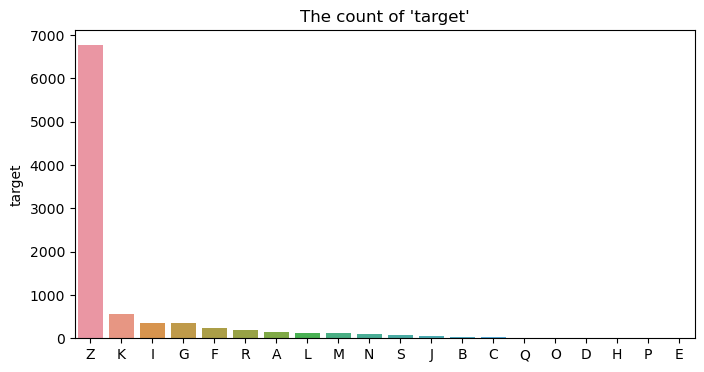

In [98]:
# Set the width and height of the figure
plt.figure(figsize=(8,4))

# Add title
plt.title("The count of 'target'")

# Bar chart
sns.barplot(x=thyroid['target'].value_counts().index, y=thyroid['target'].value_counts())

# Add label for vertical axis
plt.ylabel("target")

>The data has got null values by question mark.

In [99]:
thyroid = thyroid.replace(['?'], np.nan)
thyroid.isnull().sum()

age                             0
sex                           307
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           842
T3 measured                     0
T3                           2603
TT4 measured                    0
TT4                           441
T4U measured                    0
T4U                           808
FTI measured                    0
FTI                           801
TBG measured                    0
TBG                          8822
target                          0
dtype: int64

In [100]:
thyroid.drop(['TSH measured', 'T3 measured', 'TT4 measured', 'T4U measured',
              'FTI measured', 'TBG measured', 'TBG'], axis=1, inplace=True)
thyroid

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,target
0,29,F,f,f,f,f,f,f,f,f,...,f,f,f,f,1.6,1.9,128,NaN,NaN,Z
1,41,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,NaN,NaN,NaN,Z
2,36,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,NaN,NaN,NaN,Z
3,32,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,NaN,NaN,NaN,S
4,60,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,NaN,NaN,NaN,Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,56,M,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,64,0.83,77,Z
9167,22,M,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,91,0.92,99,Z
9168,69,M,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,113,1.27,89,I
9169,47,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,75,0.85,88,Z


In [101]:
thyroid.sex.replace({'F': 2, 'M': 1}, inplace=True)
round_values = round(thyroid.sex.mean())
thyroid.sex.fillna(round_values, inplace=True)

In [102]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=3)
cols = ['TSH', 'T3', 'TT4', 'T4U', 'FTI']
for i in cols:
   thyroid[i] = knn_imputer.fit_transform(thyroid[[i]])
thyroid.isnull().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
target                       0
dtype: int64

In [103]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = thyroid.select_dtypes(include=['object'])

In [104]:
for i in cols.columns:
    try:
        thyroid[i] = le.fit_transform(thyroid[i])
    except:
        continue

### 3. Refine data
#### Separating the features & Target

In [106]:
X = thyroid.drop('target', axis=1)
y = thyroid.target

In [107]:
X.shape

(9171, 21)

In [108]:
y.unique()

array([19, 18,  5, 10, 17,  8, 12, 13,  6,  0,  9, 11, 16,  2, 14,  7,  3,
       15,  1,  4])

#### Splitting the data to training data & valid data

In [109]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=42)

## Model Training

### 1. Create model


In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score

In [111]:
models = [LogisticRegression(solver='liblinear'),
          MultinomialNB(),
          KNeighborsClassifier(),
          DecisionTreeClassifier(criterion='entropy'),
          RandomForestClassifier(n_estimators=200),
          SVC(kernel='linear'),
          XGBClassifier()]

In [112]:
AdaBoostClassifier(n_estimators=50, base_estimator=models[3], learning_rate=1)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy'),
                   learning_rate=1)

In [113]:
# CV = 5
# cv_df = pd.DataFrame(index=range(CV * len(models)))
# entries = []
# i = 0
# for model in models:
#     model_name = model.__class__.__name__
#     accuracies = cross_val_score(model, X, y, scoring='accuracy', cv=CV)
#     print(accuracies)
#     entries.append([model_name, accuracies.mean()])
#     i += 1
# cv_df = pd.DataFrame(entries, columns=['model_name', 'accuracy'])

In [114]:
# cv_df

In [115]:
# plt.figure(figsize=(8, 6))
# plt.bar(cv_df['model_name'], cv_df['accuracy'], color='orange')
# plt.xlabel('model_name')
# plt.ylabel('Mean of accuracies')
# plt.xticks(rotation='vertical')
# plt.title('Accuracies of Algorithms')

#### Applying AdaBoost for Decision Tree

In [116]:
model = AdaBoostClassifier(n_estimators=50, base_estimator=models[3], learning_rate=1)
print(f'Accuracy scores of the data= {cross_val_score(model, X, y)}')

Accuracy scores of the data= [0.92425068 0.92420938 0.92857143 0.91875682 0.92475463]


#### Training model

In [117]:
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)

### 2. Validate model

In [118]:
print(mean_absolute_error(y_valid, y_pred))

0.584407003633961


### 3. Evaluate model
#### Accuracy Score

In [119]:
print(f'Accuracy score of valid data= {accuracy_score(y_valid, y_pred)}')
y_train_pred = model.predict(X_train)
print(f'Accuracy score of training data= {accuracy_score(y_train, y_train_pred)}')

Accuracy score of valid data= 0.9263296993723158
Accuracy score of training data= 0.9952799479166666


In [120]:
print(f'The valid score of valid data= {model.score(X_valid, y_valid)*100}%')
print(f'The train score of training data= {model.score(X_train, y_train)*100}%')

The valid score of valid data= 92.63296993723158%
The train score of training data= 99.52799479166666%


In [121]:
dic = {'A': 'hyperthyroid', 'B': 'T3 toxic', 'C': 'toxic goitre', 'D': 'secondary toxic',
       'E':	'hypothyroid', 'F':	'primary hypothyroid', 'G': 'compensated hypothyroid', 'H': 'secondary hypothyroid',
       'I': 'increased binding protein', 'J': 'decreased binding protein',
       'K': 'concurrent non-thyroidal illness',
       'L':	'consistent with replacement therapy', 'M': 'underreplaced', 'N': 'overreplaced',
       'O':	'antithyroid drugs', 'P': 'I131 treatment', 'Q': 'surgery',
       'R': 'discordant assay results', 'S': 'elevated TBG', 'T': 'elevated thyroid hormones',
       'Z': 'None'}

In [122]:
input_data = X[2001:2010]
prediction = model.predict(input_data)
prediction = np.asarray(le.inverse_transform(prediction))
for i in dic:
    for j in range(len(prediction)):
        if (prediction[j] == i):
            if i in ['A', 'B', 'C', 'D']:
                print(f'The result is {i} with the diagnosis of {dic[i]} in hyperthyroid conditions.')
            elif i in ['E', 'F', 'G', 'H']:
                print(f'The result is {i} with the diagnosis of {dic[i]} in hypothyroid conditions.')
            elif i in ('I', 'J'):
                print(f'The result is {i} with the diagnosis of {dic[i]} in binding protein.')
            elif i in ('K'):
                print(f'The result is {i} with the diagnosis of {dic[i]} in general health.')
            elif i in ('L', 'M', 'N'):
                print(f'The result is {i} with the diagnosis of {dic[i]} in replacement therapy.')
            elif i in ('R'):
                print(f'The result is {i} with the diagnosis of {dic[i]} in discordant results.')
            else:
                print(f'The result is {i} with the diagnosis of {dic[i]}.')


The result is K with the diagnosis of concurrent non-thyroidal illness in general health.
The result is Z with the diagnosis of None.
The result is Z with the diagnosis of None.
The result is Z with the diagnosis of None.
The result is Z with the diagnosis of None.
The result is Z with the diagnosis of None.
The result is Z with the diagnosis of None.
The result is Z with the diagnosis of None.
The result is Z with the diagnosis of None.


In [123]:
# for i in dic:
#     for j in range(len(prediction)):
#         if (prediction[j] == i):
#             print(f'The result is {i} with the diagnosis of {dic[i]}.')

#### Training model with K-fold

In [124]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=10)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 93.109% (1.396%)


In [125]:
results

array([0.92701525, 0.93456925, 0.91166848, 0.94002181, 0.95310796,
       0.94656489, 0.93784079, 0.91057797, 0.91494002, 0.93456925])